### 【 EDA - 산포도 】

- 전체 데이터의 분포 즉, 대표값 기준으로 퍼진 정도
- 통계량 : 편차, 분산, 표준편차, 평균절대편차, 중위절대편차, 백분위수, 사분위수

[1] 모듈 로딩<hr>

In [9]:
import pandas as pd                 ## 데이터 분석용
import numpy as np                  ## 로우 데이터 저장 및 수치 계산용
from statsmodels import robust             ## 통계 관련 모듈용
import matplotlib.pyplot as plt     ## 시각화 모듈
import koreanize_matplotlib         ## 한글 폰트 설정용

[2] 데이터 준비 <hr>

In [3]:
## 데이터 파일
DATA_FILE = '../DATA/state.csv'

stateDF = pd.read_csv(DATA_FILE)
stateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


[3] 데이터의 산포도 <hr>

In [10]:
## =============================================================
## 표준편차, 사분위수, 중위절대편차
## =============================================================
##- Pandas
print(f'표준편차 => { stateDF["Population"].std() }')
print(f'1사분위수 => { stateDF["Population"].quantile(0.25) }')
print(f'3사분위수 => { stateDF["Population"].quantile(0.75) }')
print(f'사분위수범위 => { stateDF["Population"].quantile(0.75) - stateDF["Population"].quantile(0.25) }')

##- Numpy
print(f'표준편차     => { np.std(stateDF["Population"]) }')
print(f'1사분위수    => { np.quantile(stateDF["Population"], 0.25) }')

print(f'중위절대편차  => { robust.mad(stateDF["Population"]) }')

표준편차 => 6848235.347401142
1사분위수 => 1833004.25
3사분위수 => 6680312.25
사분위수범위 => 4847308.0
표준편차     => 6779407.114632265
1사분위수    => 1833004.25
중위절대편차  => 3849876.1459979336


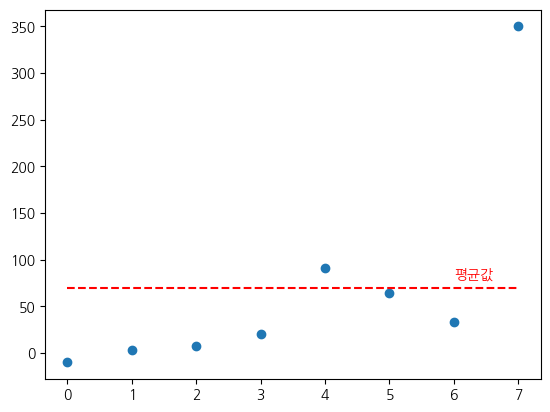

In [15]:
##- 현재 데이터 시각화
plt.scatter(ageSR.index, ageSR)
plt.hlines(70,0,7, 'red', 'dashed')
plt.text(6, 80, '평균값', color='red')
plt.show()

In [20]:
## =============================================================
## 절삭 평균 : 양극단값 제거한 데이터의 합계/개수 
## =============================================================
##- Pandas
print(f'mean => { ageSR[1:-1].mean() }')

##- Numpy
print(f'mean => { np.mean(ageSR[1:-1].values) }')

##- Python : 합계/계수
print(f'mean => { sum(ageData[1:-1]) / len(ageData)}')

##- Scipy.stats
print(f'mean => { stats.trim_mean(ageSR, 0.2)}')

mean => 36.666666666666664
mean => 36.666666666666664
mean => 27.5
mean => 36.666666666666664


In [ ]:
## =============================================================
## 가중 평균 : (가중치 * 데이터 합계)/(가중치합계). 데이터수가 적을 때
## =============================================================
##- Pandas
wSR = pd.Series([0.1, 1, 1, 1, 1, 1, 1, 0.1])

print(f'weighted_mean : {(wSR * ageSR).sum() / wSR.sum()}')

##- Numpy
np.average(ageSR.values, weight=wSR)

weighted_mean : 40.96774193548387


[3] 위치추정/대표값 찾기 - 중간값/중앙값 <hr>

In [29]:
#%pip install wquantiles
import wquantiles as wq

In [30]:
## ============================================
## 중앙값/중간값 :  오름차순 정렬 후 가운데 있는 값
## ============================================
##- Pandas
print(f'median => { ageSR.median() }')

##- Numpy
print(f'median => { np.median(ageSR) }')

median => 27.0
median => 27.0


In [31]:
## ============================================
## 가중 중앙값 : 가중치 곱한 후 정렬
## ============================================

##- wquantales
m1 = wq.median(ageSR, wSR)              # median(데이터, 가중치)
m2 = wq.quantile(ageSR, wSR, 0.5)       # quantile(데이터, 가중치, 비율)

[3] 위치추정/대표값 찾기 - 최빈값 <hr>

In [32]:
## ============================================
## 최빈값 : 가장 많이 존재하는 값
## ============================================
##- Pandas
print(f'mode => { ageSR.mode() }')

mode => 0    -10
1      3
2      8
3     21
4     33
5     64
6     91
7    350
dtype: int64
